## YOLO V5 데이터 개요

### 참조: 구글 Tutorial
- https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=X58w8JLpMnjH

### yaml 파일

- 학습 데이터의 경로, 클래스 갯수 및 종류가 적혀있는 파일
- train : 학습 데이터 폴더 경로
- val : 검증 데이터 폴더 경로
- nc : 학습할 클래스 개수
- names : 학습할 클래스 이름

### label 파일(.txt)

- https://github.com/AlexeyAB/Yolo_mark
- https://github.com/tzutalin/labelImg
- 위의 깃허브 링크를 통해 YOLO 데이터 레이블 제작

### 데이터 폴더 구조

- 전체 데이터 폴더
  - 이미지 데이터 폴더
    - train 이미지 데이터 폴더
    - val 이미지 데이터 폴더
  - 텍스트 레이블 폴더
    - train 텍스트 레이블 폴더
    - val 텍스트 레이블 폴더

## YOLOv5 기본설정

In [1]:
# Github에서 YOLOv5 다운로드
!git clone https://github.com/ultralytics/yolov5

# Dependencies 설치
%cd yolov5
%pip install -qr requirements.txt  # install dependencies, 해당 코드를 실행하지 않으면 train.py 파일이 실행되지 않음

Cloning into 'yolov5'...
remote: Enumerating objects: 12388, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12388 (delta 1), reused 4 (delta 0), pack-reused 12380
Receiving objects: 100% (12388/12388), 12.18 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (8544/8544), done.
/content/yolov5
     |████████████████████████████████| 596 kB 33.2 MB/s 


In [2]:
import torch

# 이미지를 보여주기 위한 라이브러리
from IPython.display import Image

In [3]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


## 데이터셋 다운로드(coco128)

- coco128 : COCO train 2017 데이터셋의 처음 128개 이미지 포함
  - 학습 및 테스트에 동일한 128개의 이미지 사용
  - 과적합 현상 발생

In [4]:
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'tmp.zip')

# 다운로드 받은 파일을 압축해제하고 압축파일은 삭제
!unzip -q tmp.zip -d ../ && rm tmp.zip

  0%|          | 0.00/6.66M [00:00<?, ?B/s]

## YOLOv5 학습

### VOLO V5 인자

- img : 이미지 크기
- epochs : 학습 횟수
- data : yaml 파일 경로
- weights : Pre-Trained 모델 파일 경로
- batch-size : 배치 크기
- cfg : 아키텍쳐 yaml 파일 경로
  - yolo v5는 s, m, l, x 4가지 버전 존재
  - s < m < l < x (모델 무게)

In [5]:
# 이미지 크기 : 640
# 배치 크기 : 16
# 학습 횟수 : 3
# 아키텍쳐 yaml : coco128.yaml
# 모델 버전 : yolov5s
# nosave 옵션 : 마지막 checkpoint만 저장(모델 가중치를 중간 저장하지 않음)
# cache 옵션 : 빠른 학습속도를 위한 이미지 캐싱
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --name yolov5s_clothing_detect --nosave --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_clothing_detect, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

## YOLOv5 학습 결과

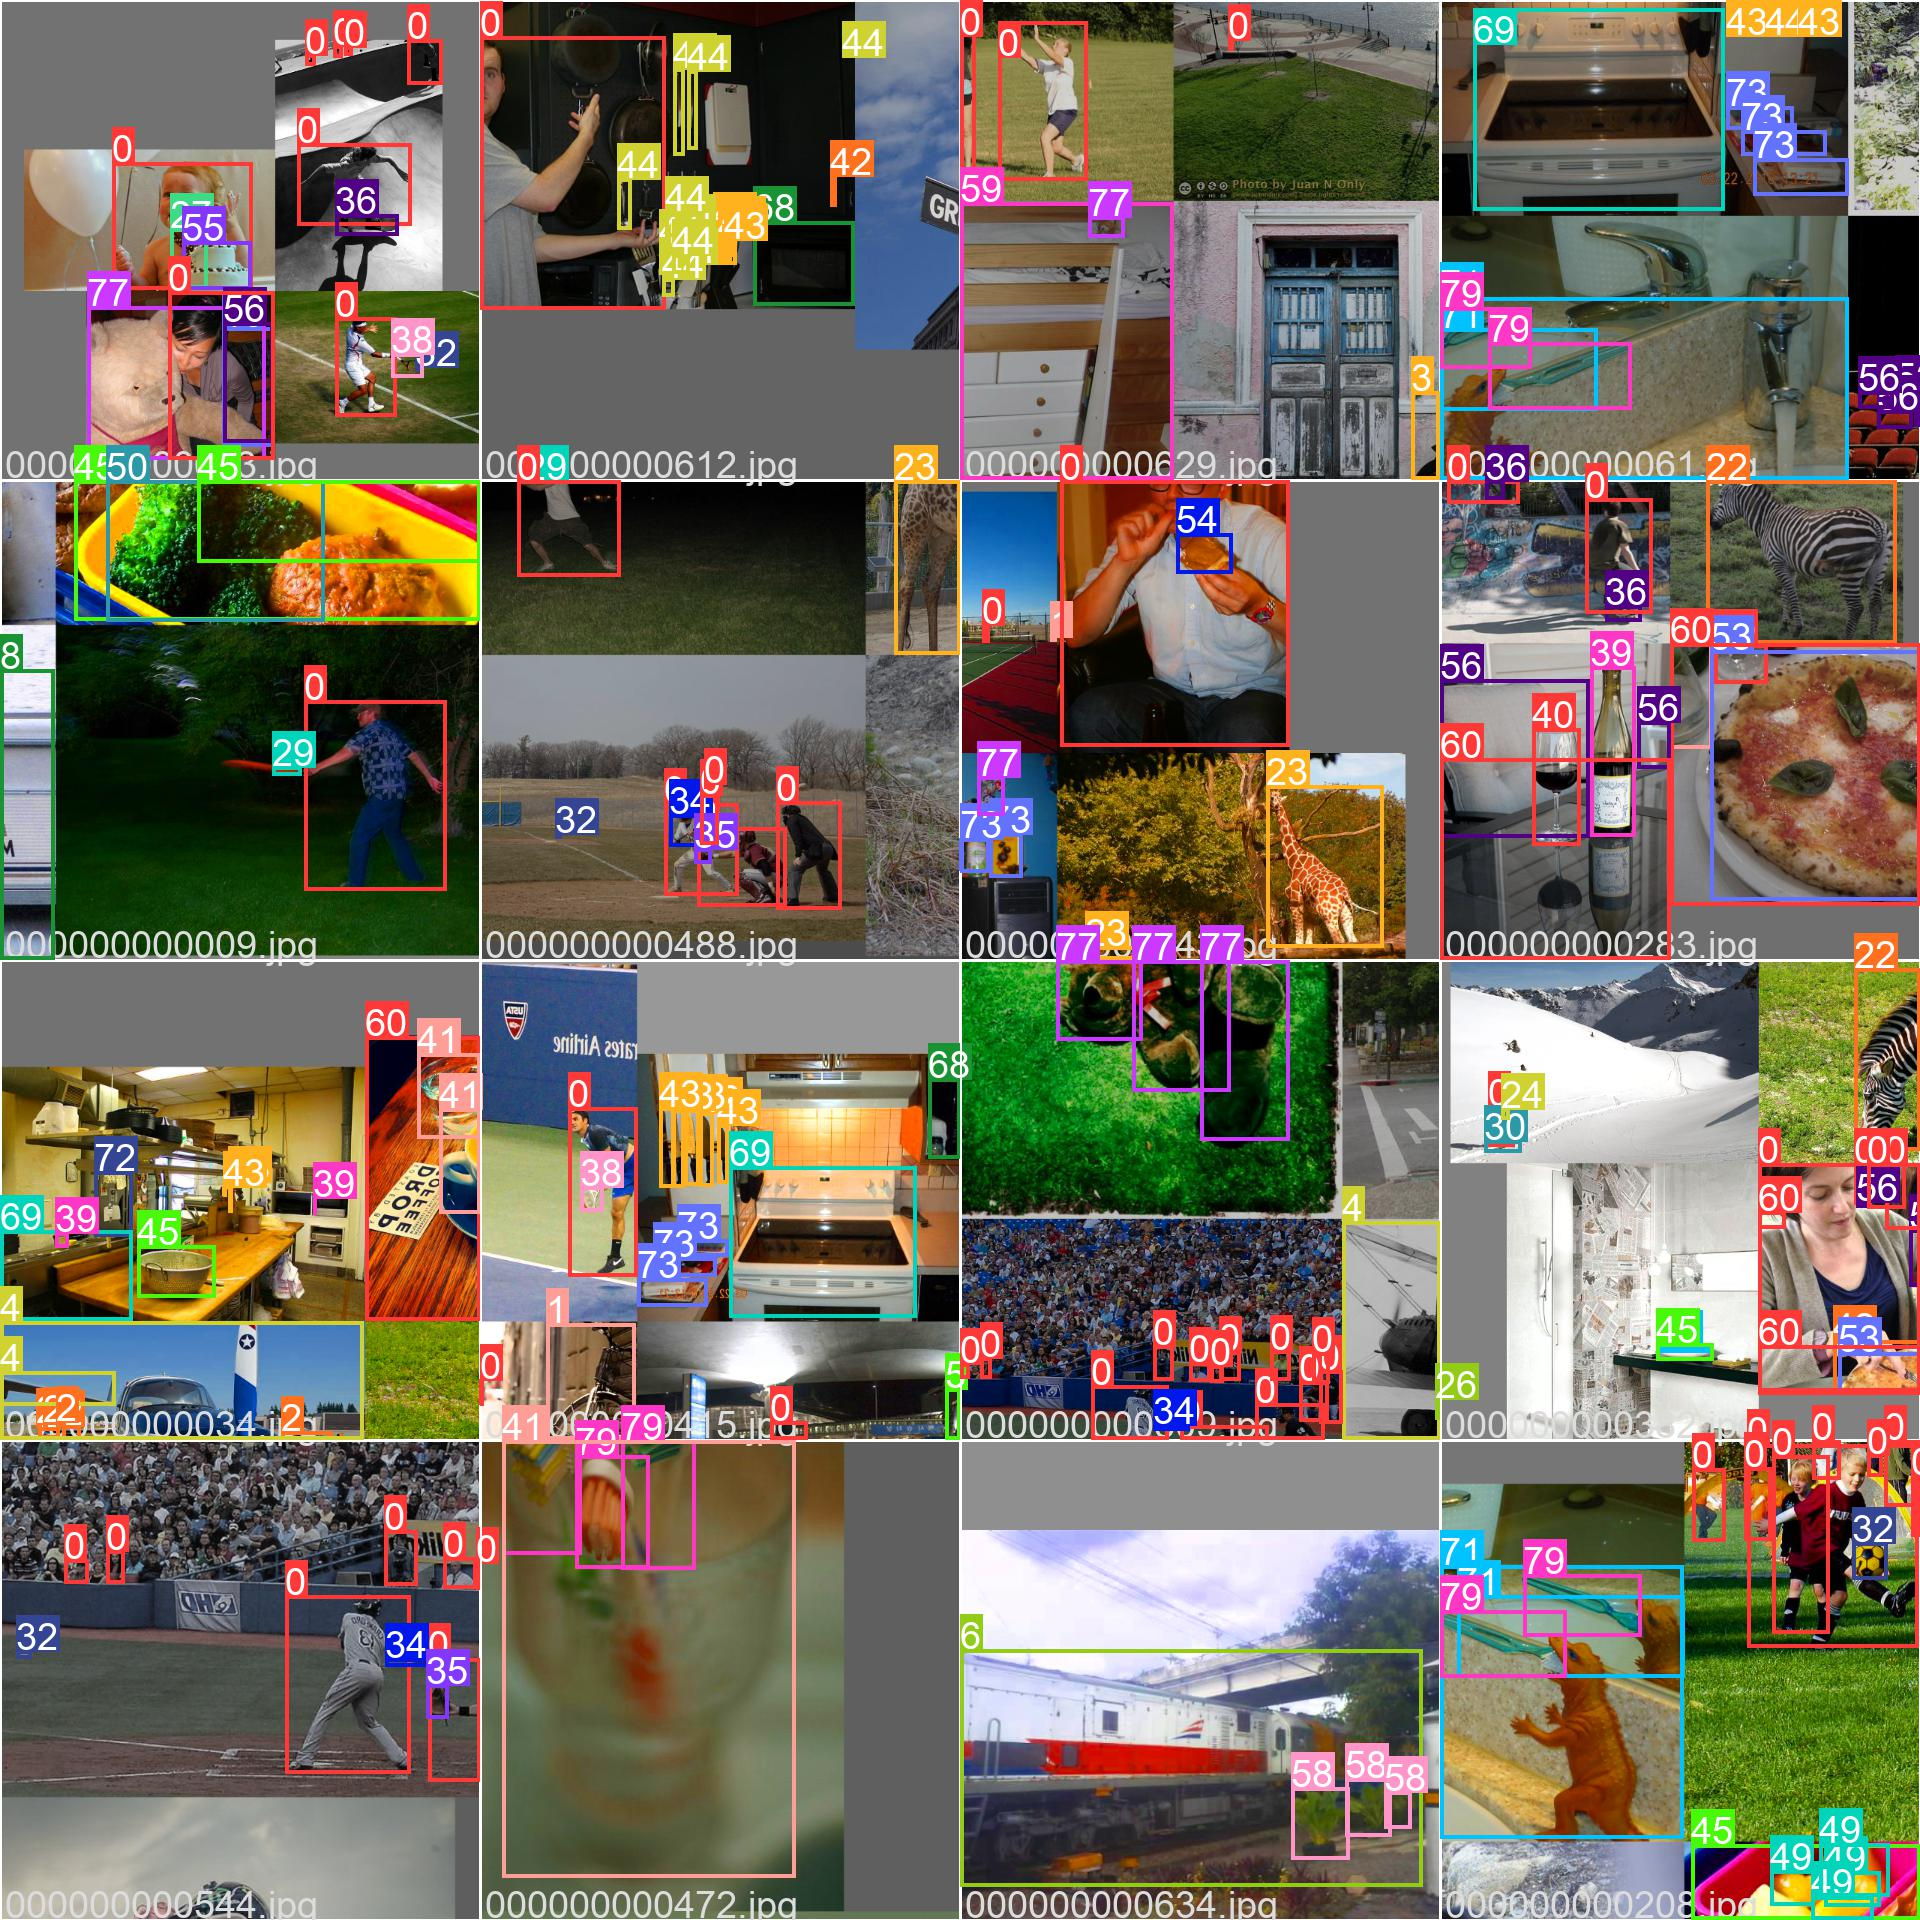

In [6]:
# 각 배치에는 16개의 이미지가 포함되어 있음
# train_batch 이미지 파일에는 객체에 대한 바운딩 박스만 그려져 있음
Image(filename='runs/train/yolov5s_clothing_detect/train_batch0.jpg', width=800)

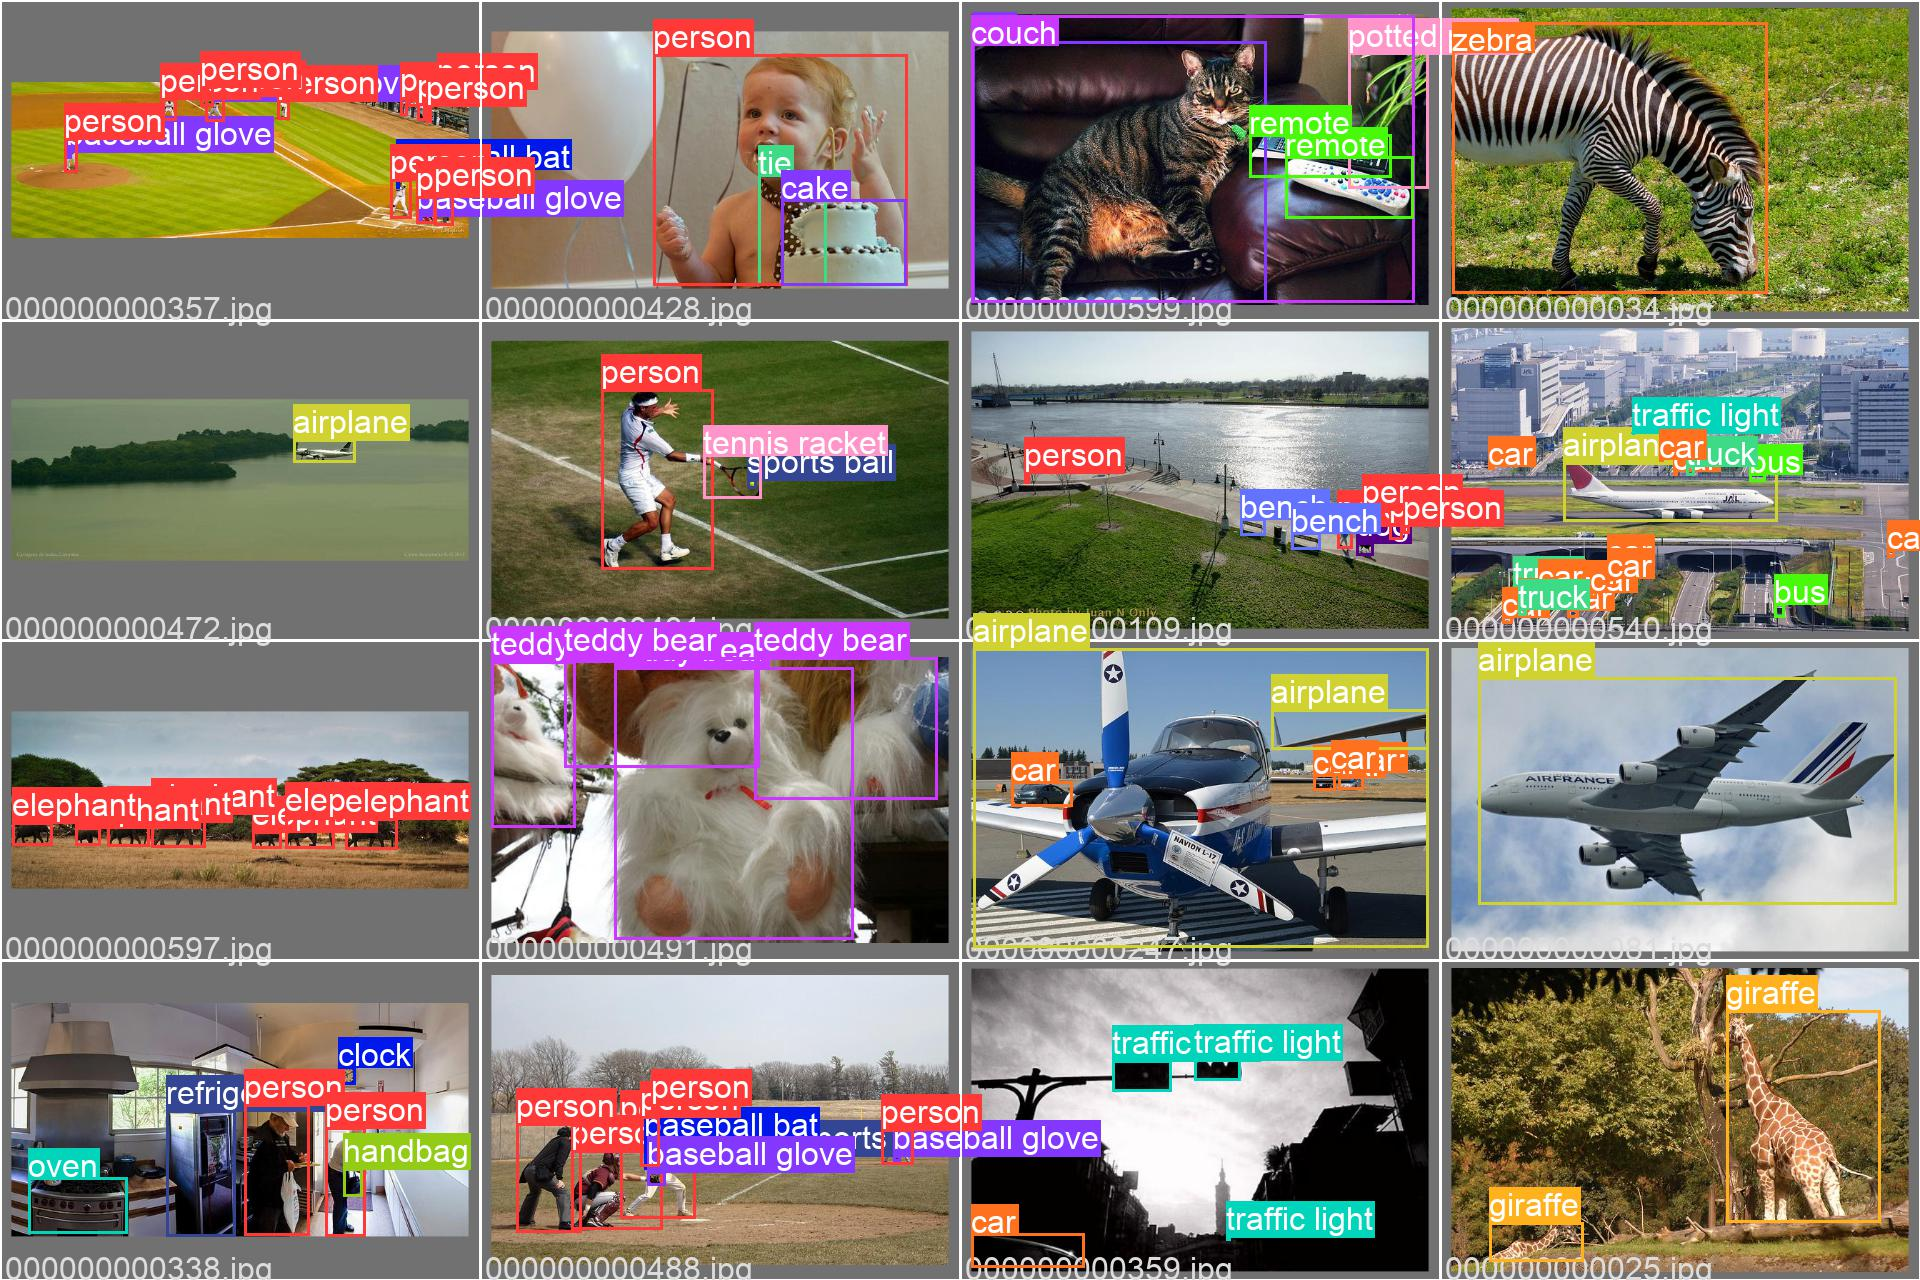

In [8]:
# val_batch_labels 이미지 파일에는 객체에 대한 바운딩 박스에 객체명이 레이블링됨
Image(filename='runs/train/yolov5s_clothing_detect/val_batch0_labels.jpg', width=800)

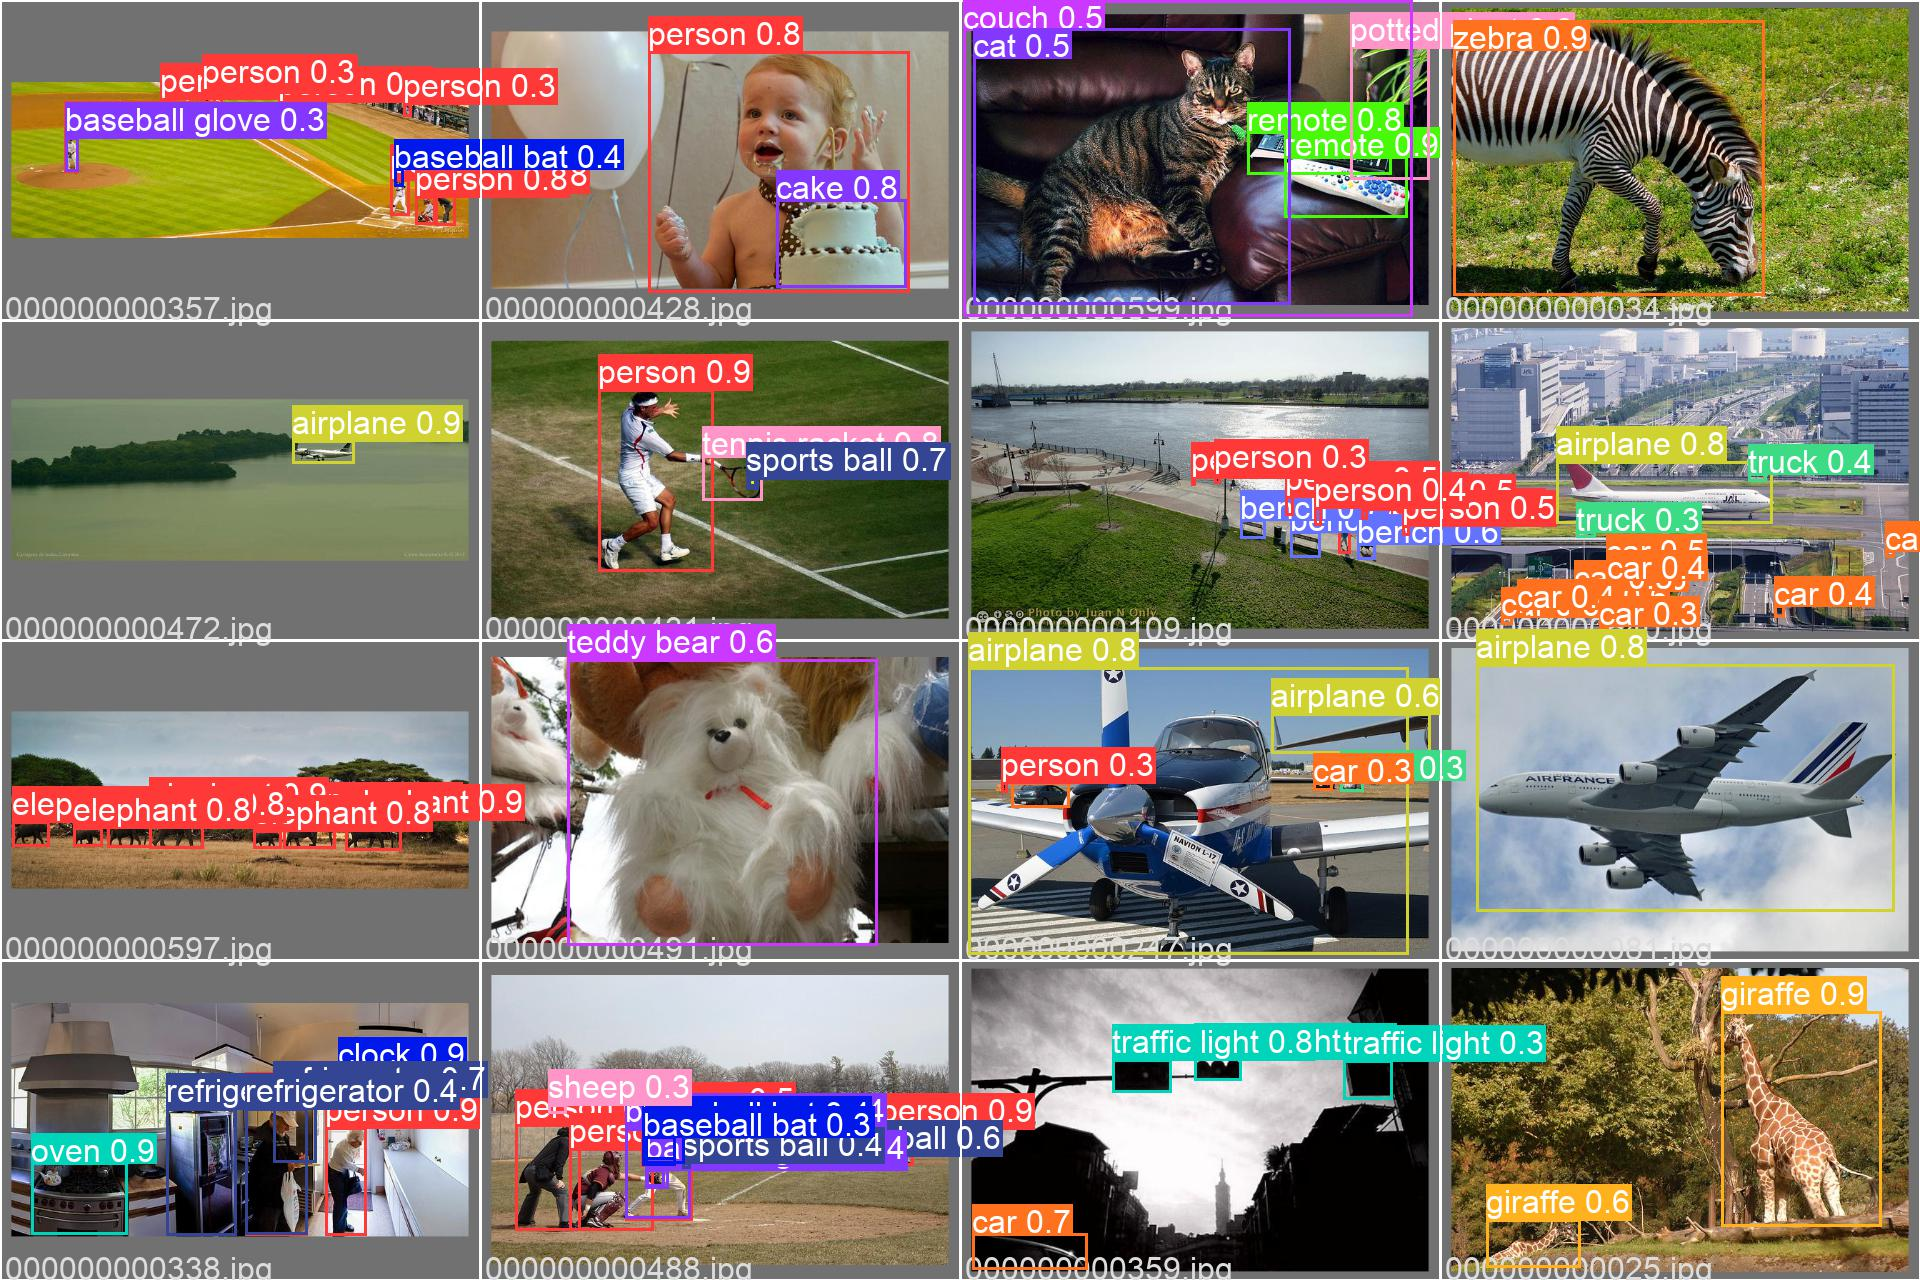

In [9]:
# val_batch_pred 이미지 파일에는 객체에 대한 바운딩 박스에 객체명 및 점수가 포함되어 있음
# 점수는 conf 옵션이 따로 설정되어 있지 않았을 경우, 기본값(0.001)로 설정되어 해당 값보다 작은 점수로 탐지된 객체는 표시되지 않음
Image(filename='runs/train/yolov5s_clothing_detect/val_batch0_pred.jpg', width=800)

## 이미지 테스트

detect: weights=['runs/train/yolov5s_clothing_detect/weights/last.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, Done. (0.016s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.017s)
Speed: 0.4ms pre-process, 16.7ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


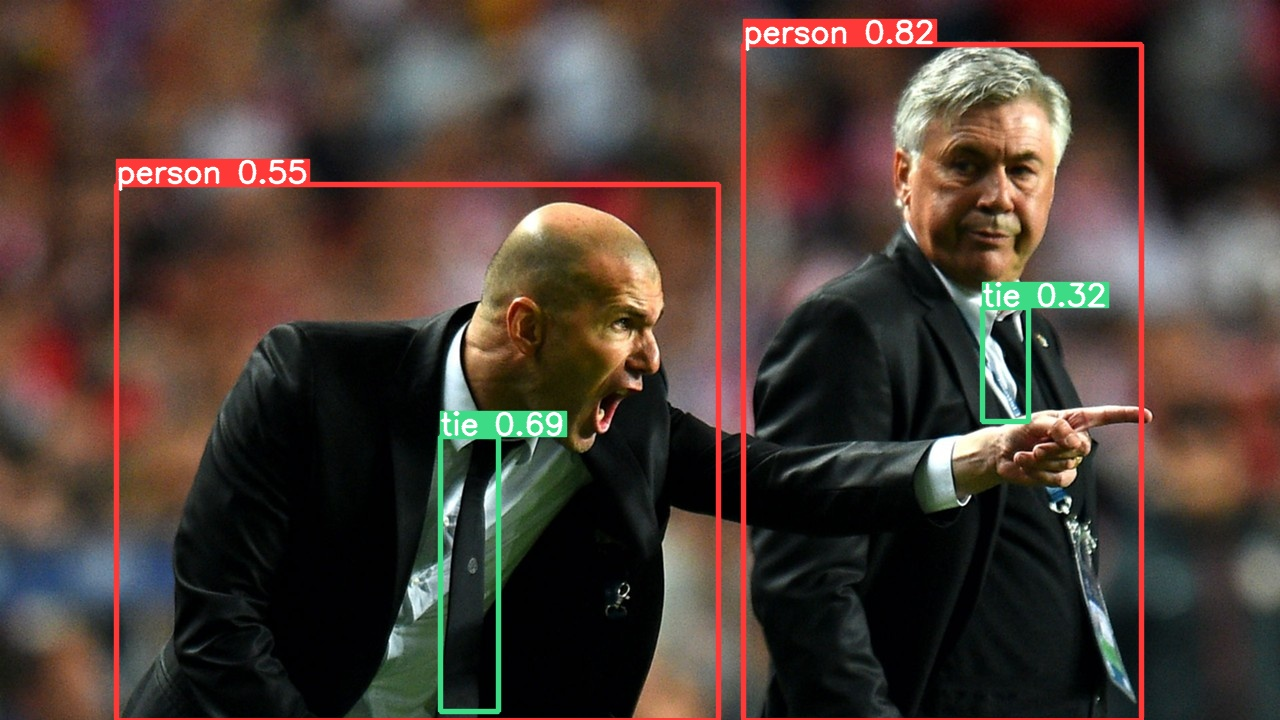

In [10]:
# 학습된 모델(해당 예제에서는 yolo5s.pt)을 가지고 임의의 이미지에 대해서 객체 탐지 수행
# source 옵션은 객체 탐지를 수행할 이미지들이 저장되어 있는 경로
# 아래 코드는 이미지 저장 경로가 data/images로 설정되어 있음
# 객체 탐지 수행 결과는 기본값으로 runs/detect/exp/
# conf 옵션을 0.25로 설정하여 해당 점수보다 낮은 점수를 가진 객체는 바운딩 박스가 표시되지 않음
!python detect.py --weights runs/train/yolov5s_clothing_detect/weights/last.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

위의 이미지 테스트는 128개의 이미지를 가지고 학습된 모델이기 때문에 정확한 객체 탐지가 수행되지 않음.

아래의 코드에서 YOLOv5 버전 중 가장 무거운 모델인 yolov5x을 사용하여 객체 탐지 성능 비교.

다운로드 받은 모델은 사전학습이 되어있는 상태.

detect: weights=['runs/train/yolov5s_clothing_detect/weights/last.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, Done. (0.019s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.017s)
Speed: 0.5ms pre-process, 17.7ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


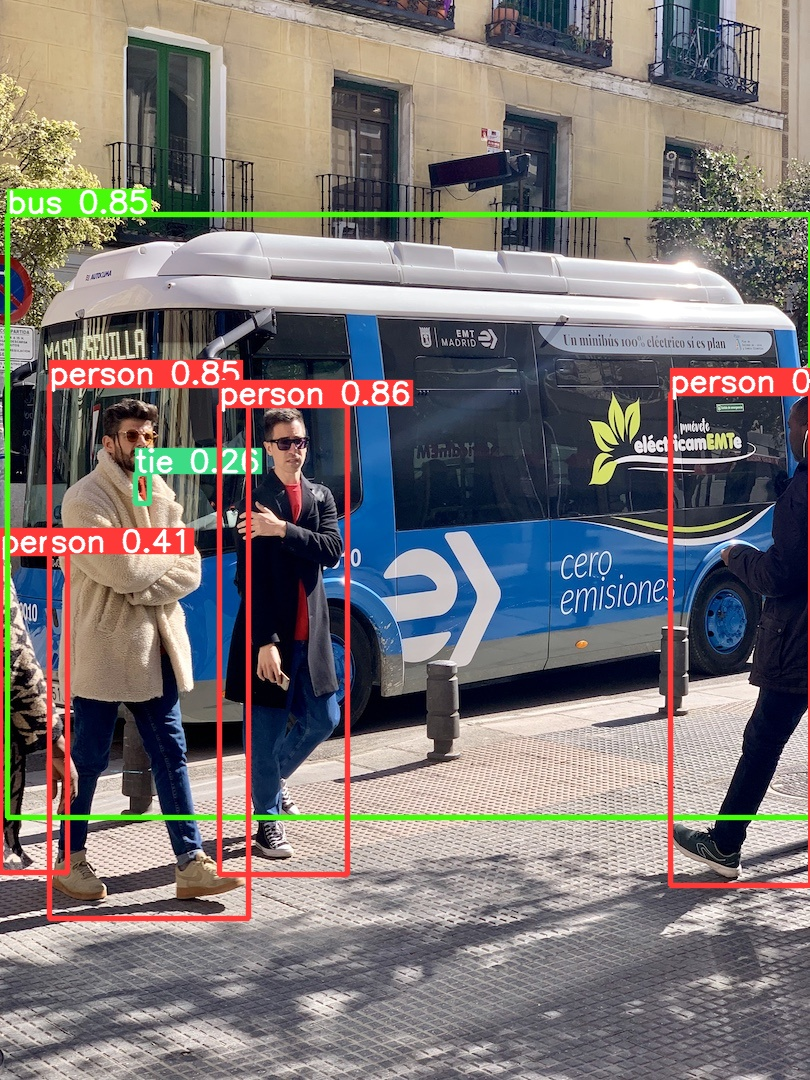

In [12]:
!python detect.py --weights runs/train/yolov5s_clothing_detect/weights/last.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/bus.jpg', width=600)

detect: weights=['yolov5x.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-277-gfdc9d91 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 166M/166M [00:21<00:00, 8.28MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.076s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 3 persons, 2 ties, Done. (0.035s)
Speed: 0.5ms pre-process, 55.7ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


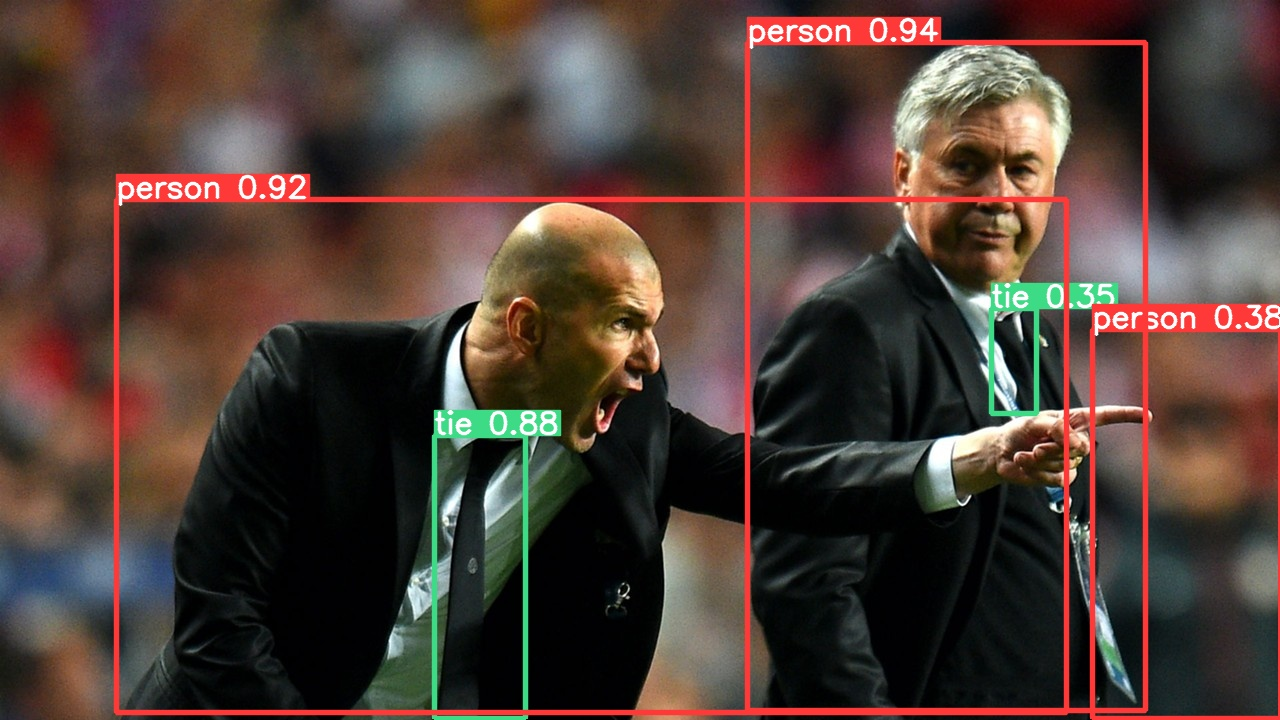

In [11]:
# project 옵션과 name 옵션을 합한 디렉토리 생성
# project 기본값은 runs/detect
# name 기본값 : exp
# 아래 코드에서는 project = default(runs/detect)이고, name = exp2이므로 detect.py를 실행한 결과가 저장되는 경로는 runs/detect/exp2
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/images/ --name exp2
Image(filename='runs/detect/exp2/zidane.jpg', width=600)